## Librerias

In [22]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

N = 1000

## Constraste o prueba de Kolmogorov-Smirnov (Uniformidad)

In [63]:
def Kolmogorov(x):
    u = [1.0] * N
    x1 = np.cumsum(np.divide(u,N)) # arange(2,20,4)genera un vector de 2 - 20 con incrementos de 4
    y1 = np.cumsum(np.divide(u,N)) # vector de suma acumulada 0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1

    x2 = np.sort(x) # Ordena los numeros 0.2, 0.4, 0.1, 0.7,0.3
    y2 = np.cumsum(x2/np.max(np.cumsum(x))) #Suma acumulada, Maximo de suma acumulada de X

    De=np.absolute(y2-y1) # Desviacion estandar impirica

    print 'De = ',np.max(De)
    Tope = 1.73/math.sqrt(N)
    if np.max(De) < Tope:
        print 'Se rechaza la hipotesis de uniformidad'
    else:
        print 'Se acepta la hipotesis de uniformidad'

        
    # Plotting
    plt.plot(x1,y1,label='Uniform')
    #plt.show()
    plt.plot(x2,y2,label='Random')

    x3 = [x2[De.argmax()], x2[De.argmax()]]
    y3 = [np.min([x2[De.argmax()],y2[De.argmax()]]), np.max([x2[De.argmax()],y2[De.argmax()]])]

    plt.step(x3,y3,label='D')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)

    plt.show()

## X^2

In [64]:
def chi2(k,x):

    count, bins, ignored = plt.hist(x, k, normed=False)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

    T = 0
    for i in count:
        e = N/float(k)
        T += ((i - e)**2)/e
    #print x
    if T > 124.3:
        print 'Se rechaza la hipotesis de uniformidad'
    else:
        print 'Se acepta la hipotesis de uniformidad'

    print 'T:',T


## Test de rachas

In [103]:

def racha(x):
    racha = []
    for i in range(len(x)-1):
        if x[i] > x[i+1]:
            racha.append(0)
        elif x[i] < x[i+1]:
            racha.append(1)
    #print racha
    R = 1 #Rachas
    for i in range(len(racha)-1):
        if racha[i] != racha[i+1]: 
            R+=1
    print 'Rachas:',R
    Z = (R - (2*N-1)/float(3))/math.sqrt((16*N-29)/float(90))
    print '|Z|:',np.absolute(Z)
    
    #print math.sqrt((16*n-29)/float(90))

# Borland C/C++

In [104]:
def borland(x, n):
    r = []
    for i in range(n):
        x = (22695477*x + 1)%(2**32)
        r.append(float(x)/2**32)
    return r
#print borland(1, 10)
x = borland(43567, N)



# Kolmogorov-Smirnov - Borland C/C++

De =  0.256990226162
Se acepta la hipotesis de uniformidad


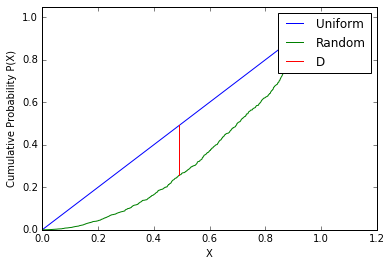

In [105]:
Kolmogorov(x)

# X^2 - Borland C/C++

Se acepta la hipotesis de uniformidad
T: 93.426


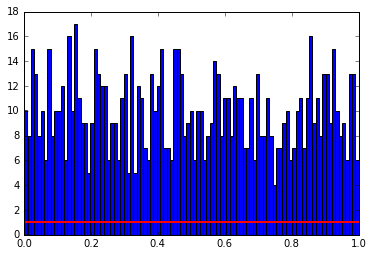

In [106]:
chi2(101,x)

#  Test de Rachas - Borland C/C++

In [107]:
racha(x)


Rachas: 661
|Z|: 0.400362993519


# Numerical Reciepes

In [108]:
def reciepies(x, n):
    r = []
    for i in range(n):
        x = (1664525*x + 1013904223)%(2**32)
        r.append(float(x)/2**32)
    return r
#print reciepies(1,10)
x = reciepies(43562, N)

# Kolmogorov-Smirnov - Numerical Reciepes

De =  0.248462695296
Se acepta la hipotesis de uniformidad


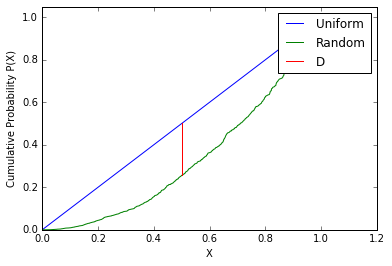

In [109]:
Kolmogorov(x)

# X^2 - Numerical Reciepes

Se acepta la hipotesis de uniformidad
T: 101.304


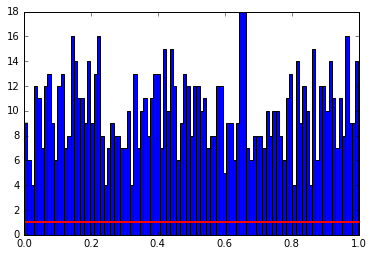

In [110]:
chi2(101,x)

#  Test de Rachas - Numerical Reciepes

In [111]:
racha(x)

Rachas: 646
|Z|: 1.52638391279


# Sinclair

In [112]:
def sinclair(x, n):
    r = []
    for i in range(n):
        x = (75*x)%((2**16)+1)
        r.append(float(x)/((2**16)+1))
    return r
#print sinclair(1, 10)
s = sinclair(43562, N)

# Kolmogorov-Smirnov - Sinclair

De =  0.248462695296
Se acepta la hipotesis de uniformidad


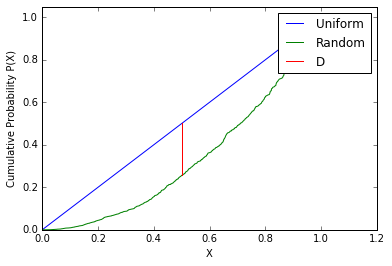

In [113]:
Kolmogorov(x)

# X^2 - Sinclair

Se acepta la hipotesis de uniformidad
T: 101.304


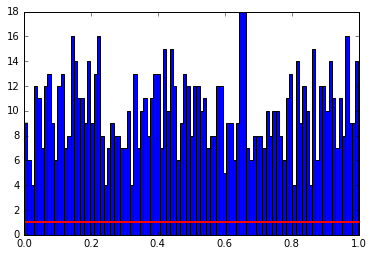

In [114]:
chi2(101,x)

#  Test de rachas - Sinclair

In [115]:
racha(x)

Rachas: 646
|Z|: 1.52638391279


# RANDU

In [116]:
def randu(x, n):
    r = []
    for i in range(n):
        x = (65539*x)%(2**31)
        r.append(float(x)/(2**31))
    return r

x = randu(43562, N)

# Kolmogorov-Smirnov - RANDU

De =  0.248757371873
Se acepta la hipotesis de uniformidad


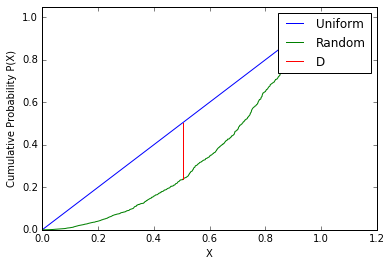

In [117]:
Kolmogorov(x)

# X^2 - RANDU

Se acepta la hipotesis de uniformidad
T: 121.908


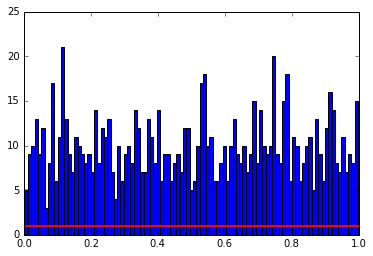

In [118]:
chi2(101,x)

#  Test de rachas - RANDU

In [119]:
racha(x)

Rachas: 663
|Z|: 0.250226870949
